## Context

The price of newly made cars are mostly determined by the Original General Manufacturer. However at resale the price needs to be re-determined and at that time the price is uncertain expecially based on the number of factors surrounding the vehicle.

## The Objective

The objective of this report and study is to identify and create a model that will accurately identify the appropriate price point

## Key Questions

- what are good metrics to measure our success?
- what are the most significant variables to correspond to the price?
- what need to be done to the data set before applying the model?
- what will make a good model and how will we implement it?

### Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

# going to be using the knn method to generate the rest of the missing values
from sklearn.impute import KNNImputer

### Load Data

In [2]:
data = pd.read_csv("used_cars.csv")

### Preliminary Veiwing

In [3]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [4]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


### Data Types and Null Values

In [5]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [6]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

Observations and Insights: We observe that there are a number of missing values from Engine Power and Seats. The Columns missing alot of their values are Price and New_price, where a significant portion or a majority of the entries are missing

In [7]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns=['S.No.'], inplace=True)

### Data Exploration

In [8]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


Observations and Insights: All of the columns look like they follow a normal distribution while the New_price and Price columns look like they skew right

## Data Exploration (Categorical variables)

In [9]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.select_dtypes(include = ['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second
...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,Diesel,Manual,First
7249,Volkswagen Polo GT TSI,Mumbai,Petrol,Automatic,First
7250,Nissan Micra Diesel XV,Kolkata,Diesel,Manual,First
7251,Volkswagen Polo GT TSI,Pune,Petrol,Automatic,Third


In [10]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


Observations and insights: The cars have teh most variance the rest of the variables are only missing a couple of variables

### Checking extreme Kilometer Values

In [11]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: Based on the information of the highest kilometers driven that most vehicules are an older model and have a manual Transmission. All of the cars were first owned and have a generally consistent Mileage of around 18. Finally the all cars have 5 seating or more.**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [12]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(index=2328, inplace=True)

**Check Mileage extreme values**

In [13]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by='Mileage', ascending=True).head(10) # I believe this was suppose to be a sort_values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [14]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

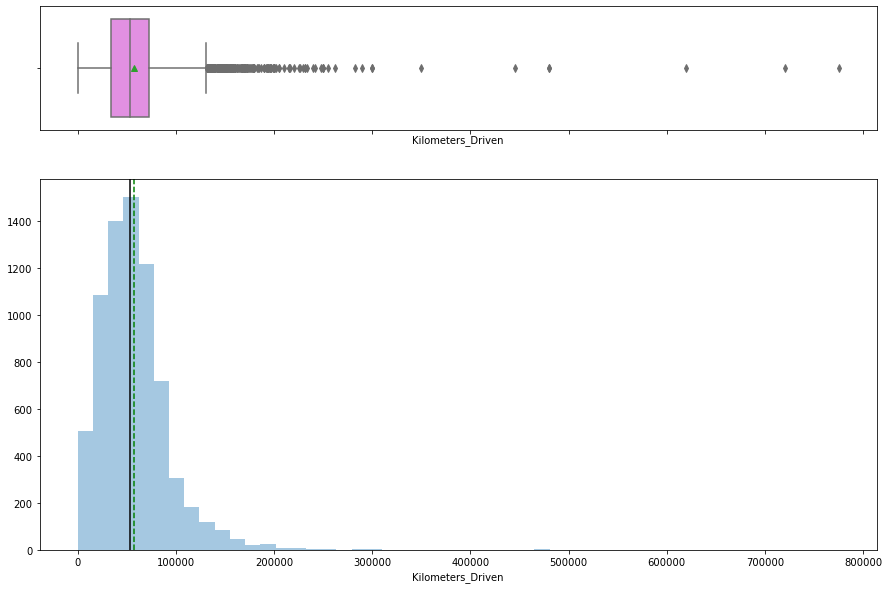

In [15]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?
** Answer **: If we allow this skew in the data it may also skew our results 

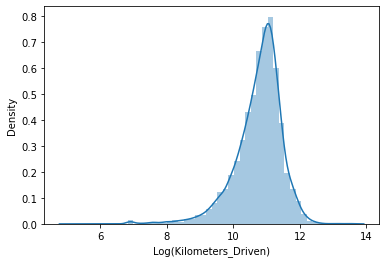

In [16]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: The kilometers_Driven is more normalized once a log function has been applied to it**

In [17]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

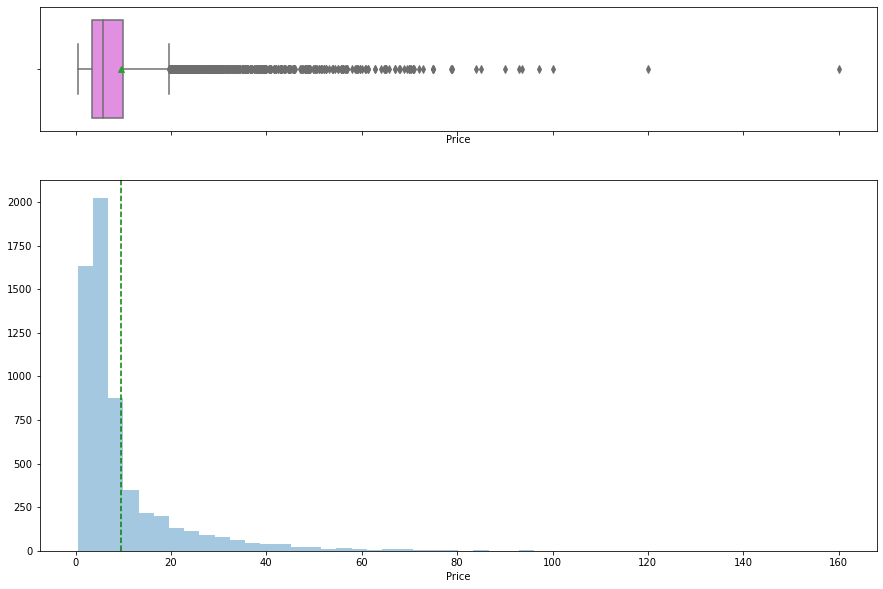

In [18]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

In [19]:
# Log transformation of the feature 'Price'
price_log = np.log(data["Price"])

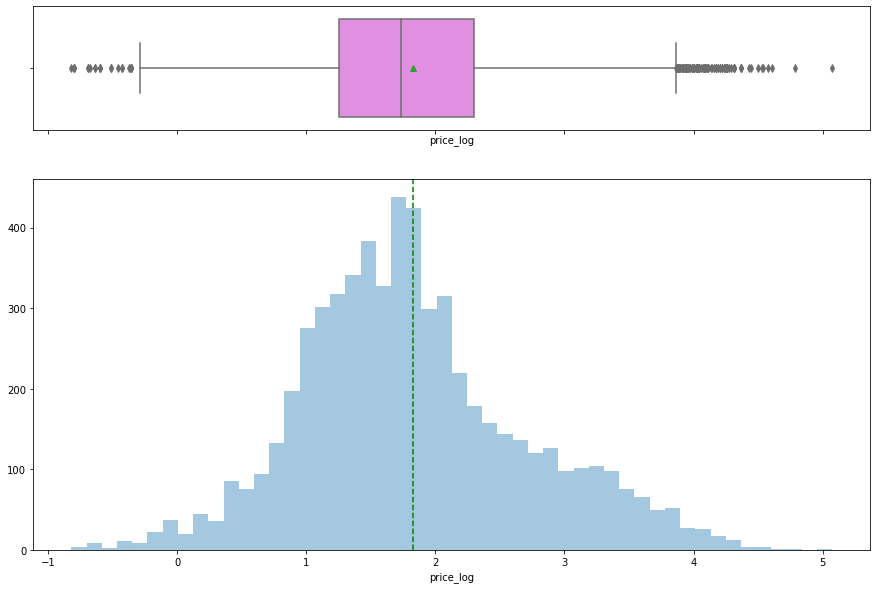

In [20]:
# We can Add a transformed Price feature in data
data["price_log"] = price_log
histogram_boxplot(data['price_log'])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

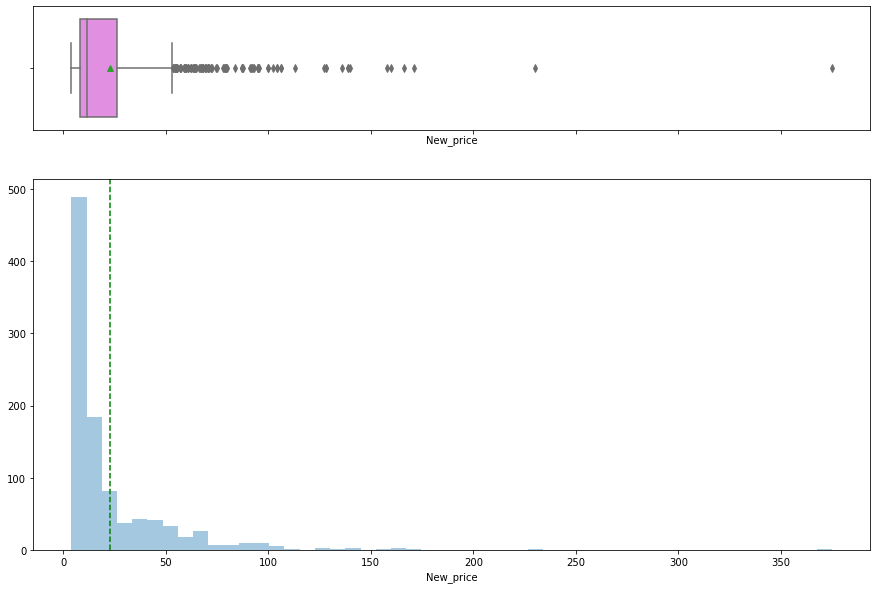

In [21]:
histogram_boxplot(data['New_price'])

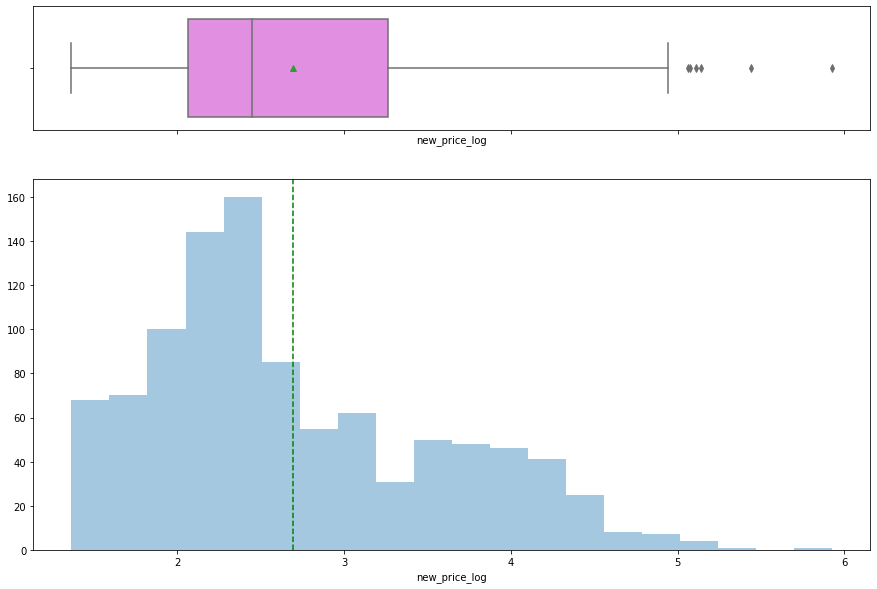

In [22]:
data["new_price_log"] = np.log(data["New_price"])
histogram_boxplot(data['new_price_log'])

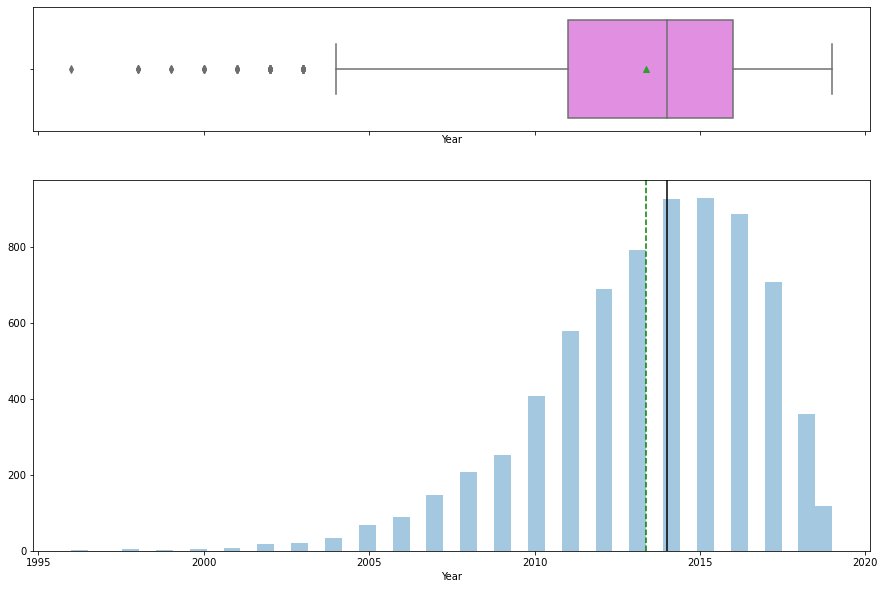

In [23]:
histogram_boxplot(data['Year'])

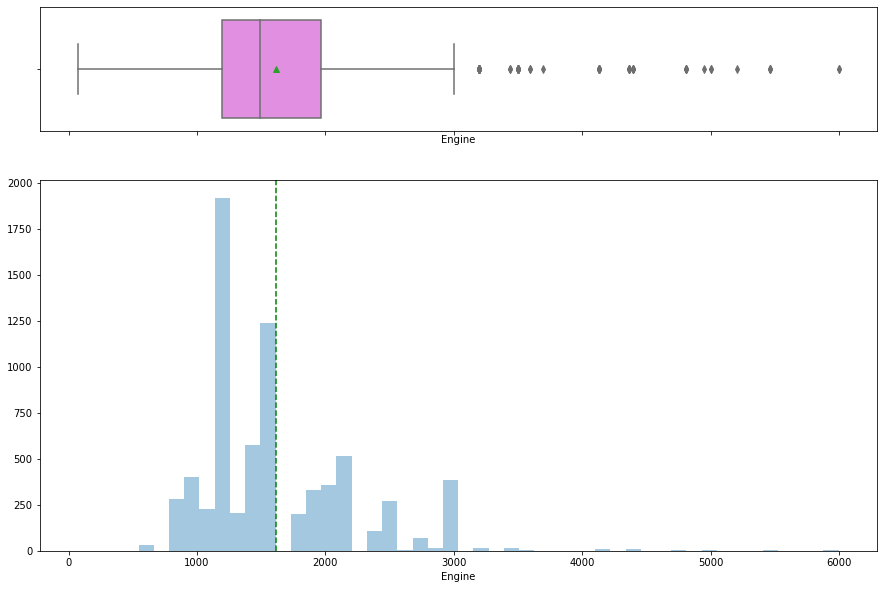

In [24]:
histogram_boxplot(data['Engine'])

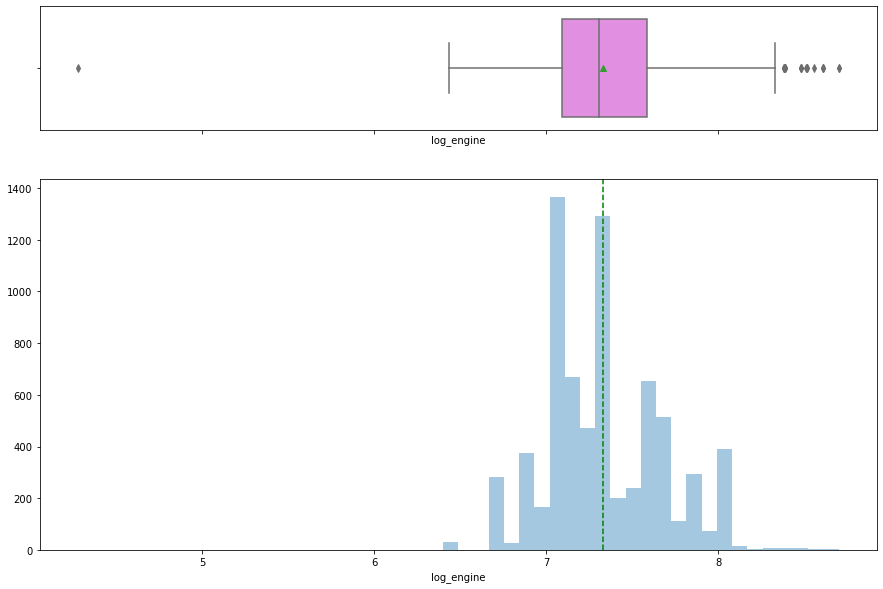

In [25]:
data["log_engine"] = np.log(data["Engine"])
histogram_boxplot(data['log_engine'])

Observation: There was a slight skew however by logging the engine we determine that 

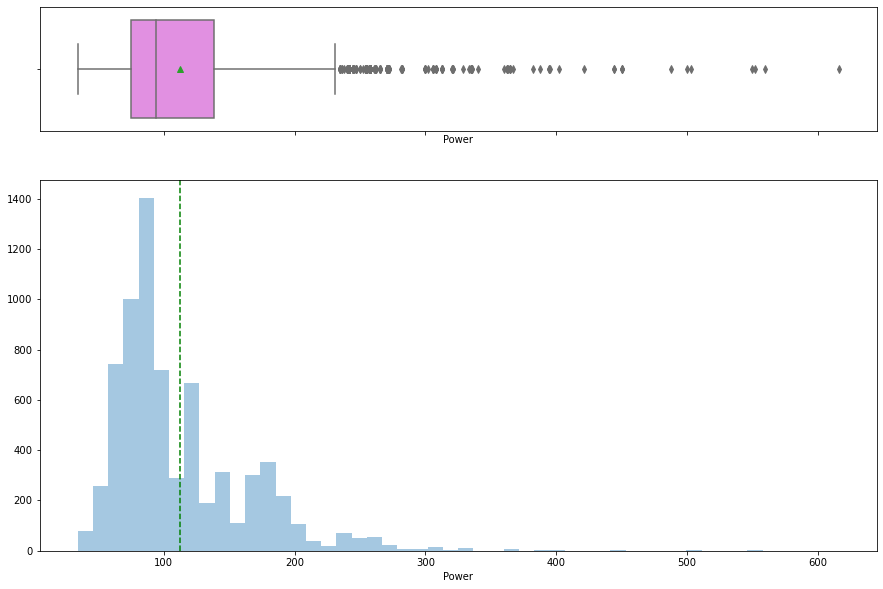

In [26]:
histogram_boxplot(data['Power'])

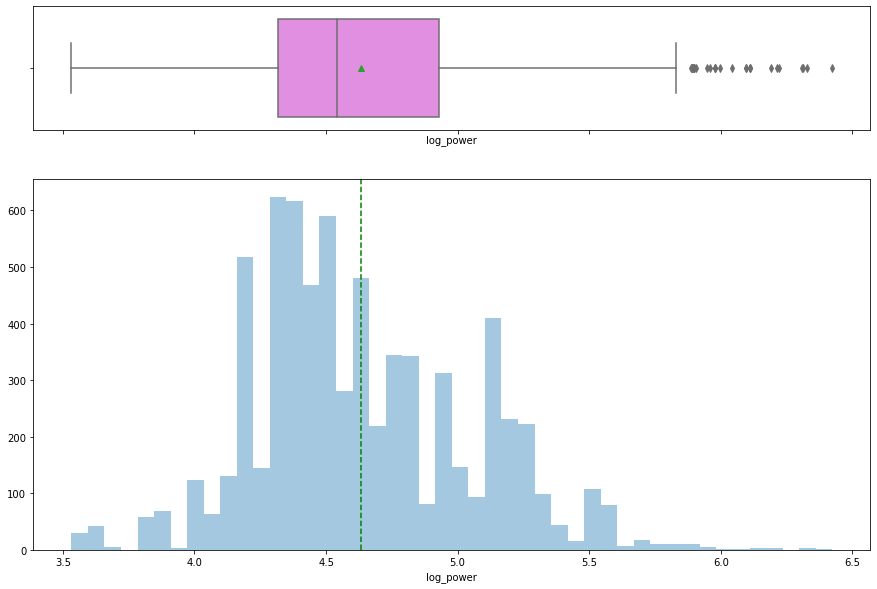

In [27]:
data["log_power"] = np.log(data["Power"])
histogram_boxplot(data['log_power'])

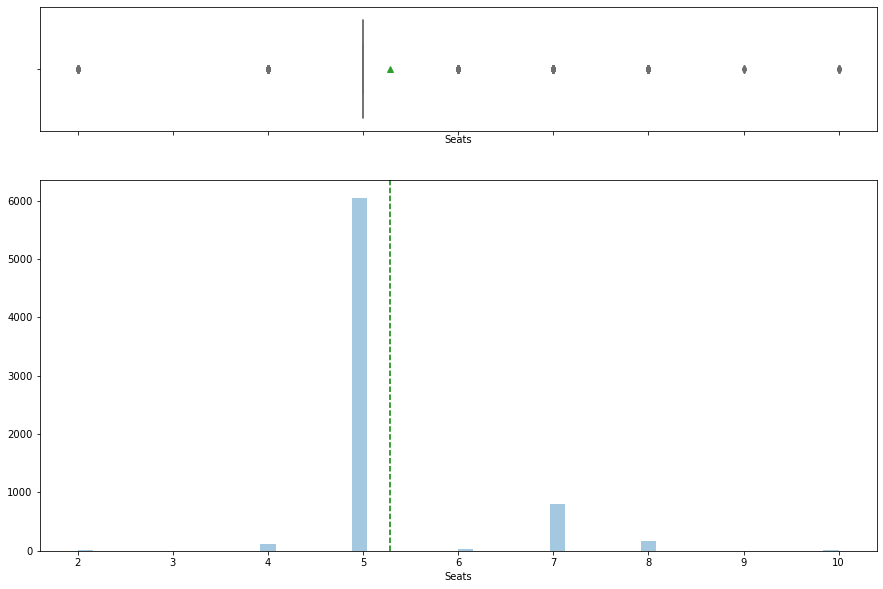

In [28]:
histogram_boxplot(data['Seats'])

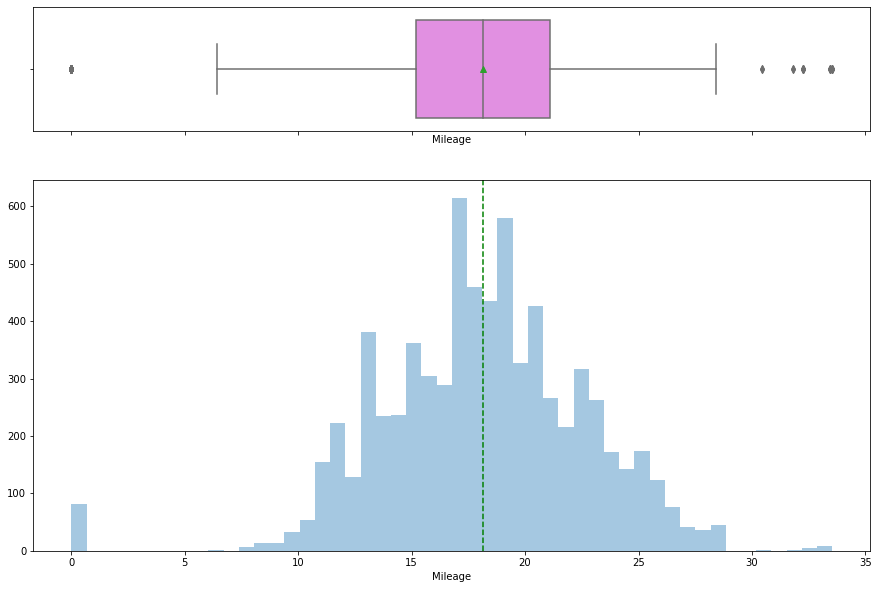

In [29]:
histogram_boxplot(data['Mileage'])

**Observations and Insights for all the plots: The prices and new prices of the vehicules are very skewed and them the log function was applied to normalize them. The rest of the columns seem to fit within the normal graph parameters well enough**

As part of the box plots we see that generally when we take the log we reduce the number of outliers shown in the boxplot inplying that there the boxplot has more coverage over the points.


## **2. Univariate analysis - Categorical Data**

In [30]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y),size = 12) # Annotate the percantage
        
    # needed to add rotation to the xticks to clearly see the bar names for the brand (column that I though would add to the analysis)
    plt.xticks(rotation = 45)
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

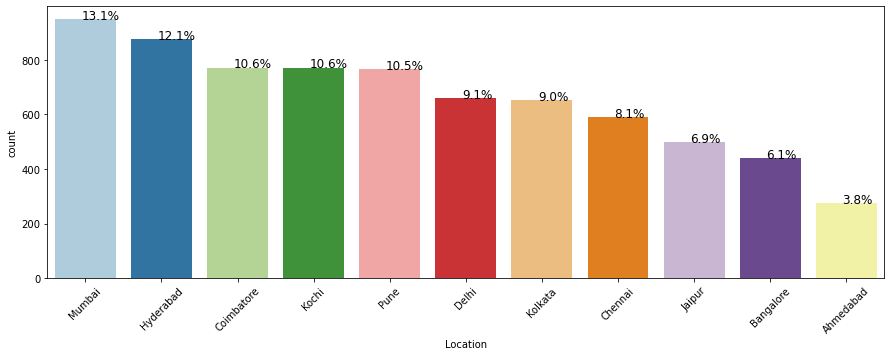

In [31]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

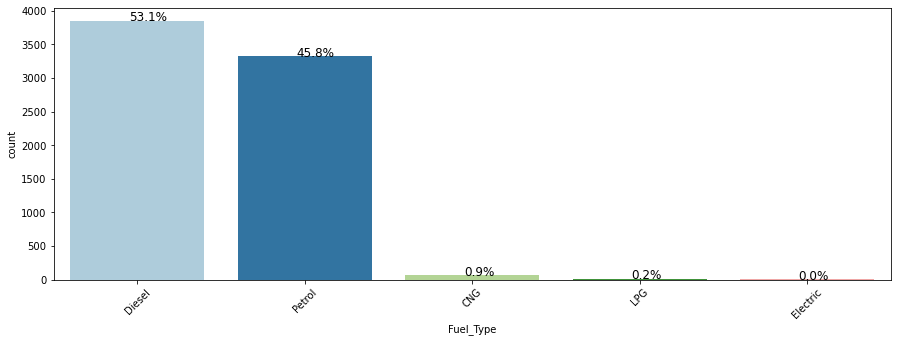

In [32]:
perc_on_bar("Fuel_Type")

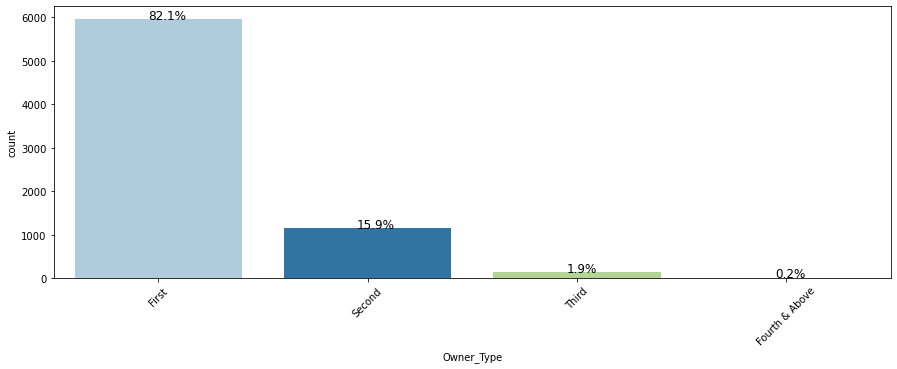

In [33]:
perc_on_bar("Owner_Type")

**Observations and Insights from all plots: Overall it appears that the categorical data usually trneds to 1 or 2 types of answers. However these are values that we will not be able to normalize due to the fact these bar graph are about their percentages and not part of the values themselves.**

We will have to keep in mind that the owners skew heavily first when taking into consideration when depending on Owners vairable.
Fuel type heavily skew towards Petrol and Diesel and a judgement can probably be made between the 2 of these option however it mostly disregards the rest of the fuel types.
The location seems the most balanced where a decision regarding the pricing could be mostly fair.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   int64  
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   float64
 8   Engine                 7206 non-null   float64
 9   Power                  7077 non-null   float64
 10  Seats                  7199 non-null   float64
 11  New_price              1006 non-null   float64
 12  Price                  6018 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

<AxesSubplot:xlabel='price_log'>

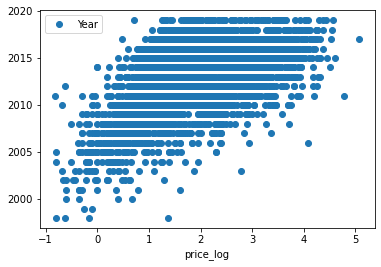

In [35]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='Location'>

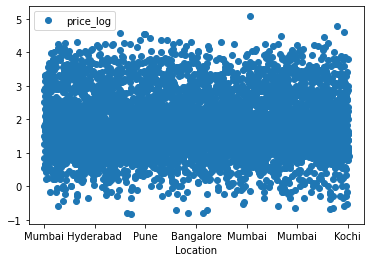

In [36]:
data.plot(x = 'Location', y = 'price_log', style = 'o')

<AxesSubplot:xlabel='new_price_log'>

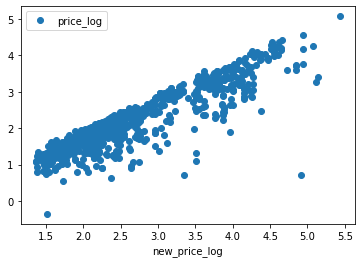

In [37]:
data.plot(x = 'new_price_log', y = 'price_log', style = 'o')

<AxesSubplot:xlabel='Seats'>

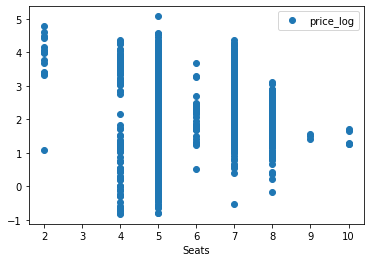

In [38]:
data.plot(x = 'Seats', y = 'price_log', style = 'o')

<AxesSubplot:xlabel='log_power'>

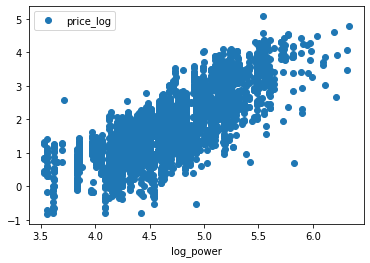

In [39]:
data.plot(x = 'log_power', y = 'price_log', style = 'o')

<AxesSubplot:xlabel='log_engine'>

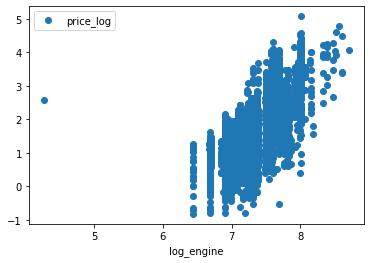

In [40]:
data.plot(x = 'log_engine', y = 'price_log', style = 'o')

<AxesSubplot:xlabel='Kilometers_Driven'>

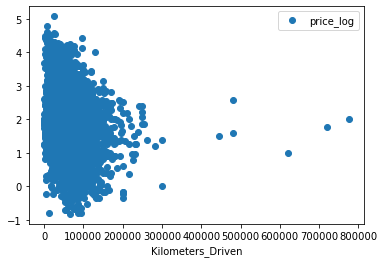

In [41]:
data.plot(x = 'Kilometers_Driven', y = 'price_log', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: **
- Generally we see large clusters due to the outliers. If there aren't any outliers we can determine that some variables such as location doesn't appear to have an impact on the price while vairables such as new_price_log, log_engine, and log_power have a correlation with the price.


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

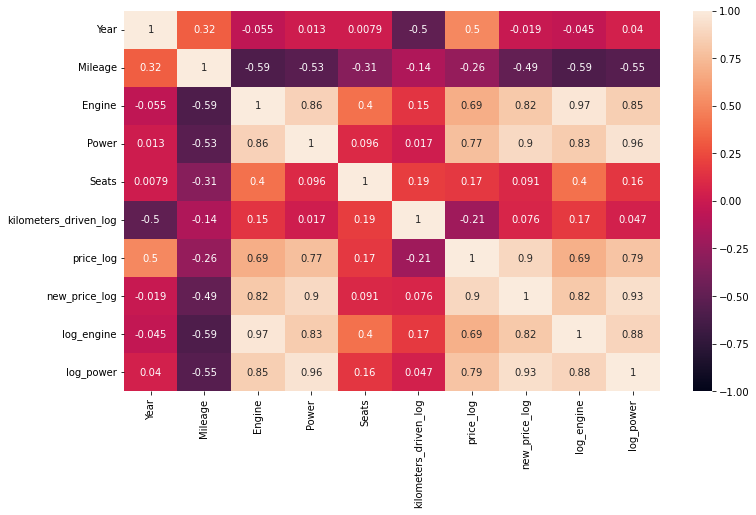

In [42]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(["Kilometers_Driven","Price", "New_price"],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

### **3. Box plot**

In [43]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    plt.xticks(rotation=90)
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    plt.xticks(rotation=90)
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

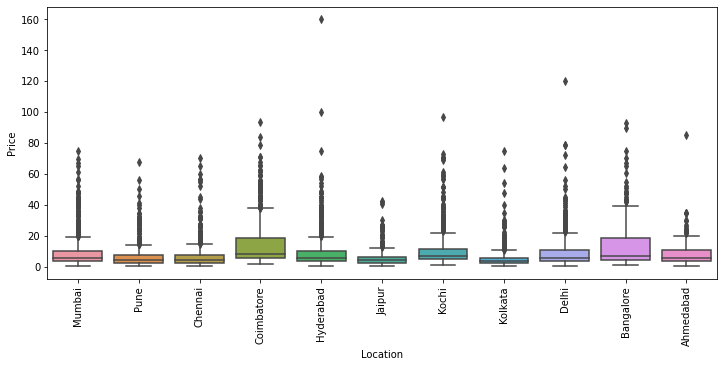

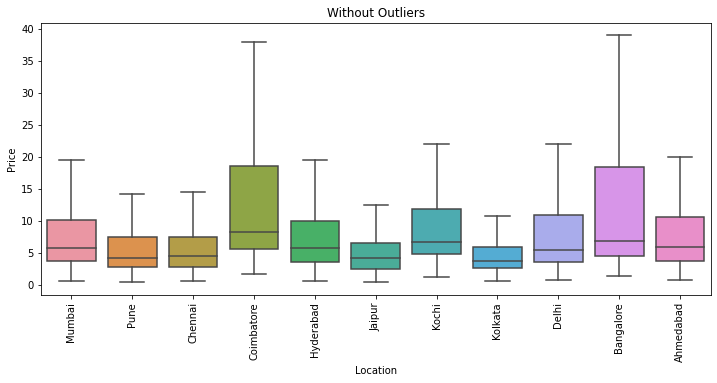

In [44]:
# Box Plot: Price vs Location
boxplot(data['Location'])

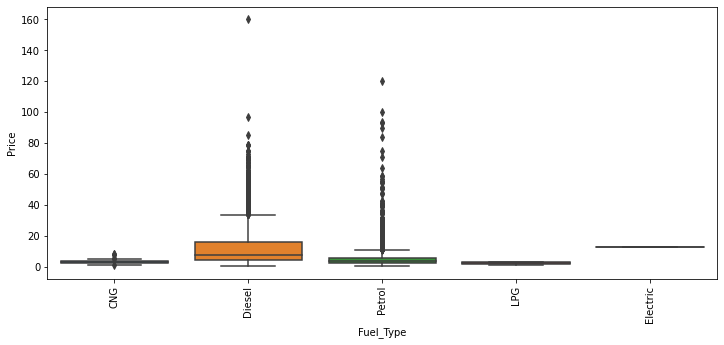

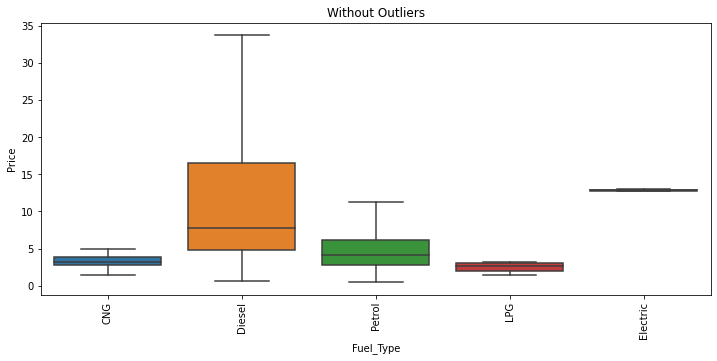

In [45]:
# Box Plot: Price vs Fuel_Type
boxplot(data['Fuel_Type'])

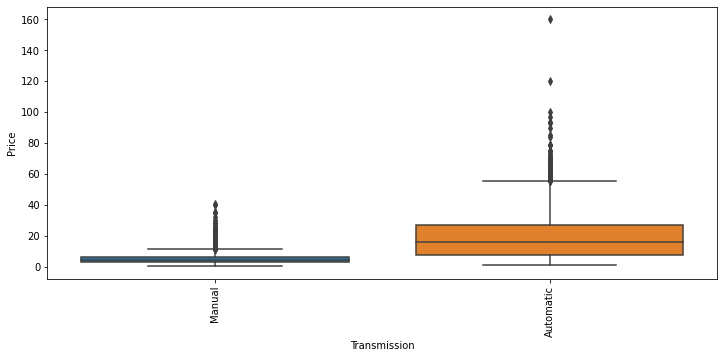

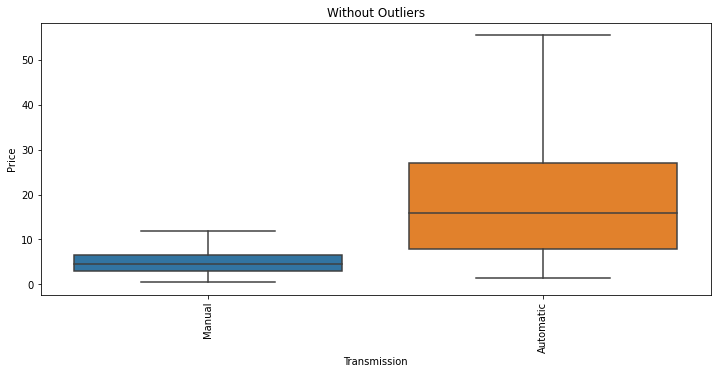

In [46]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

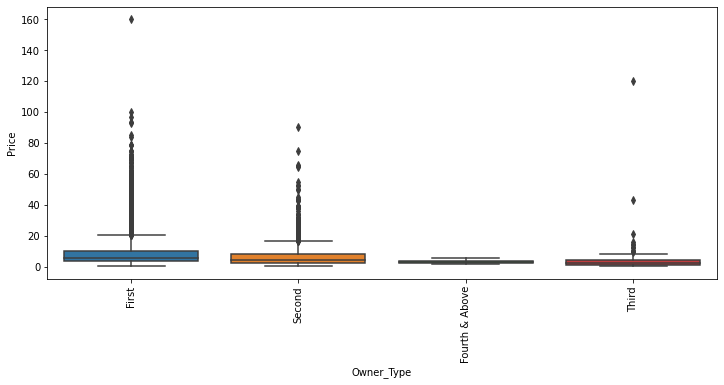

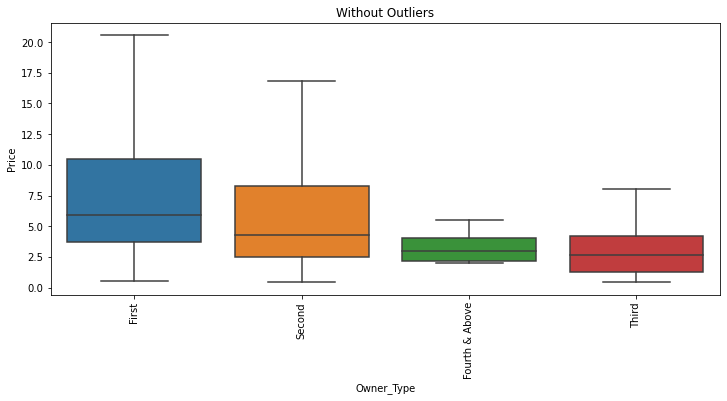

In [47]:
# Box Plot: Price vs Owner_type
boxplot(data['Owner_Type'])

    <b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots: For all of the graphs the number of outliers show that they crowd most of the values near the bottom of the graph, only when we remove the outliers does a more complete message form. The pricer cars were sold from Bangalore and Coimbatore. The diesel and electric cars are most costly than the other variants. the Automatic transmission cars sell consistently higher than the manual transmission. First car owners are willing to buy the more costly cars and  afterwards they become more savvy.**


**4. Pairs Plot**

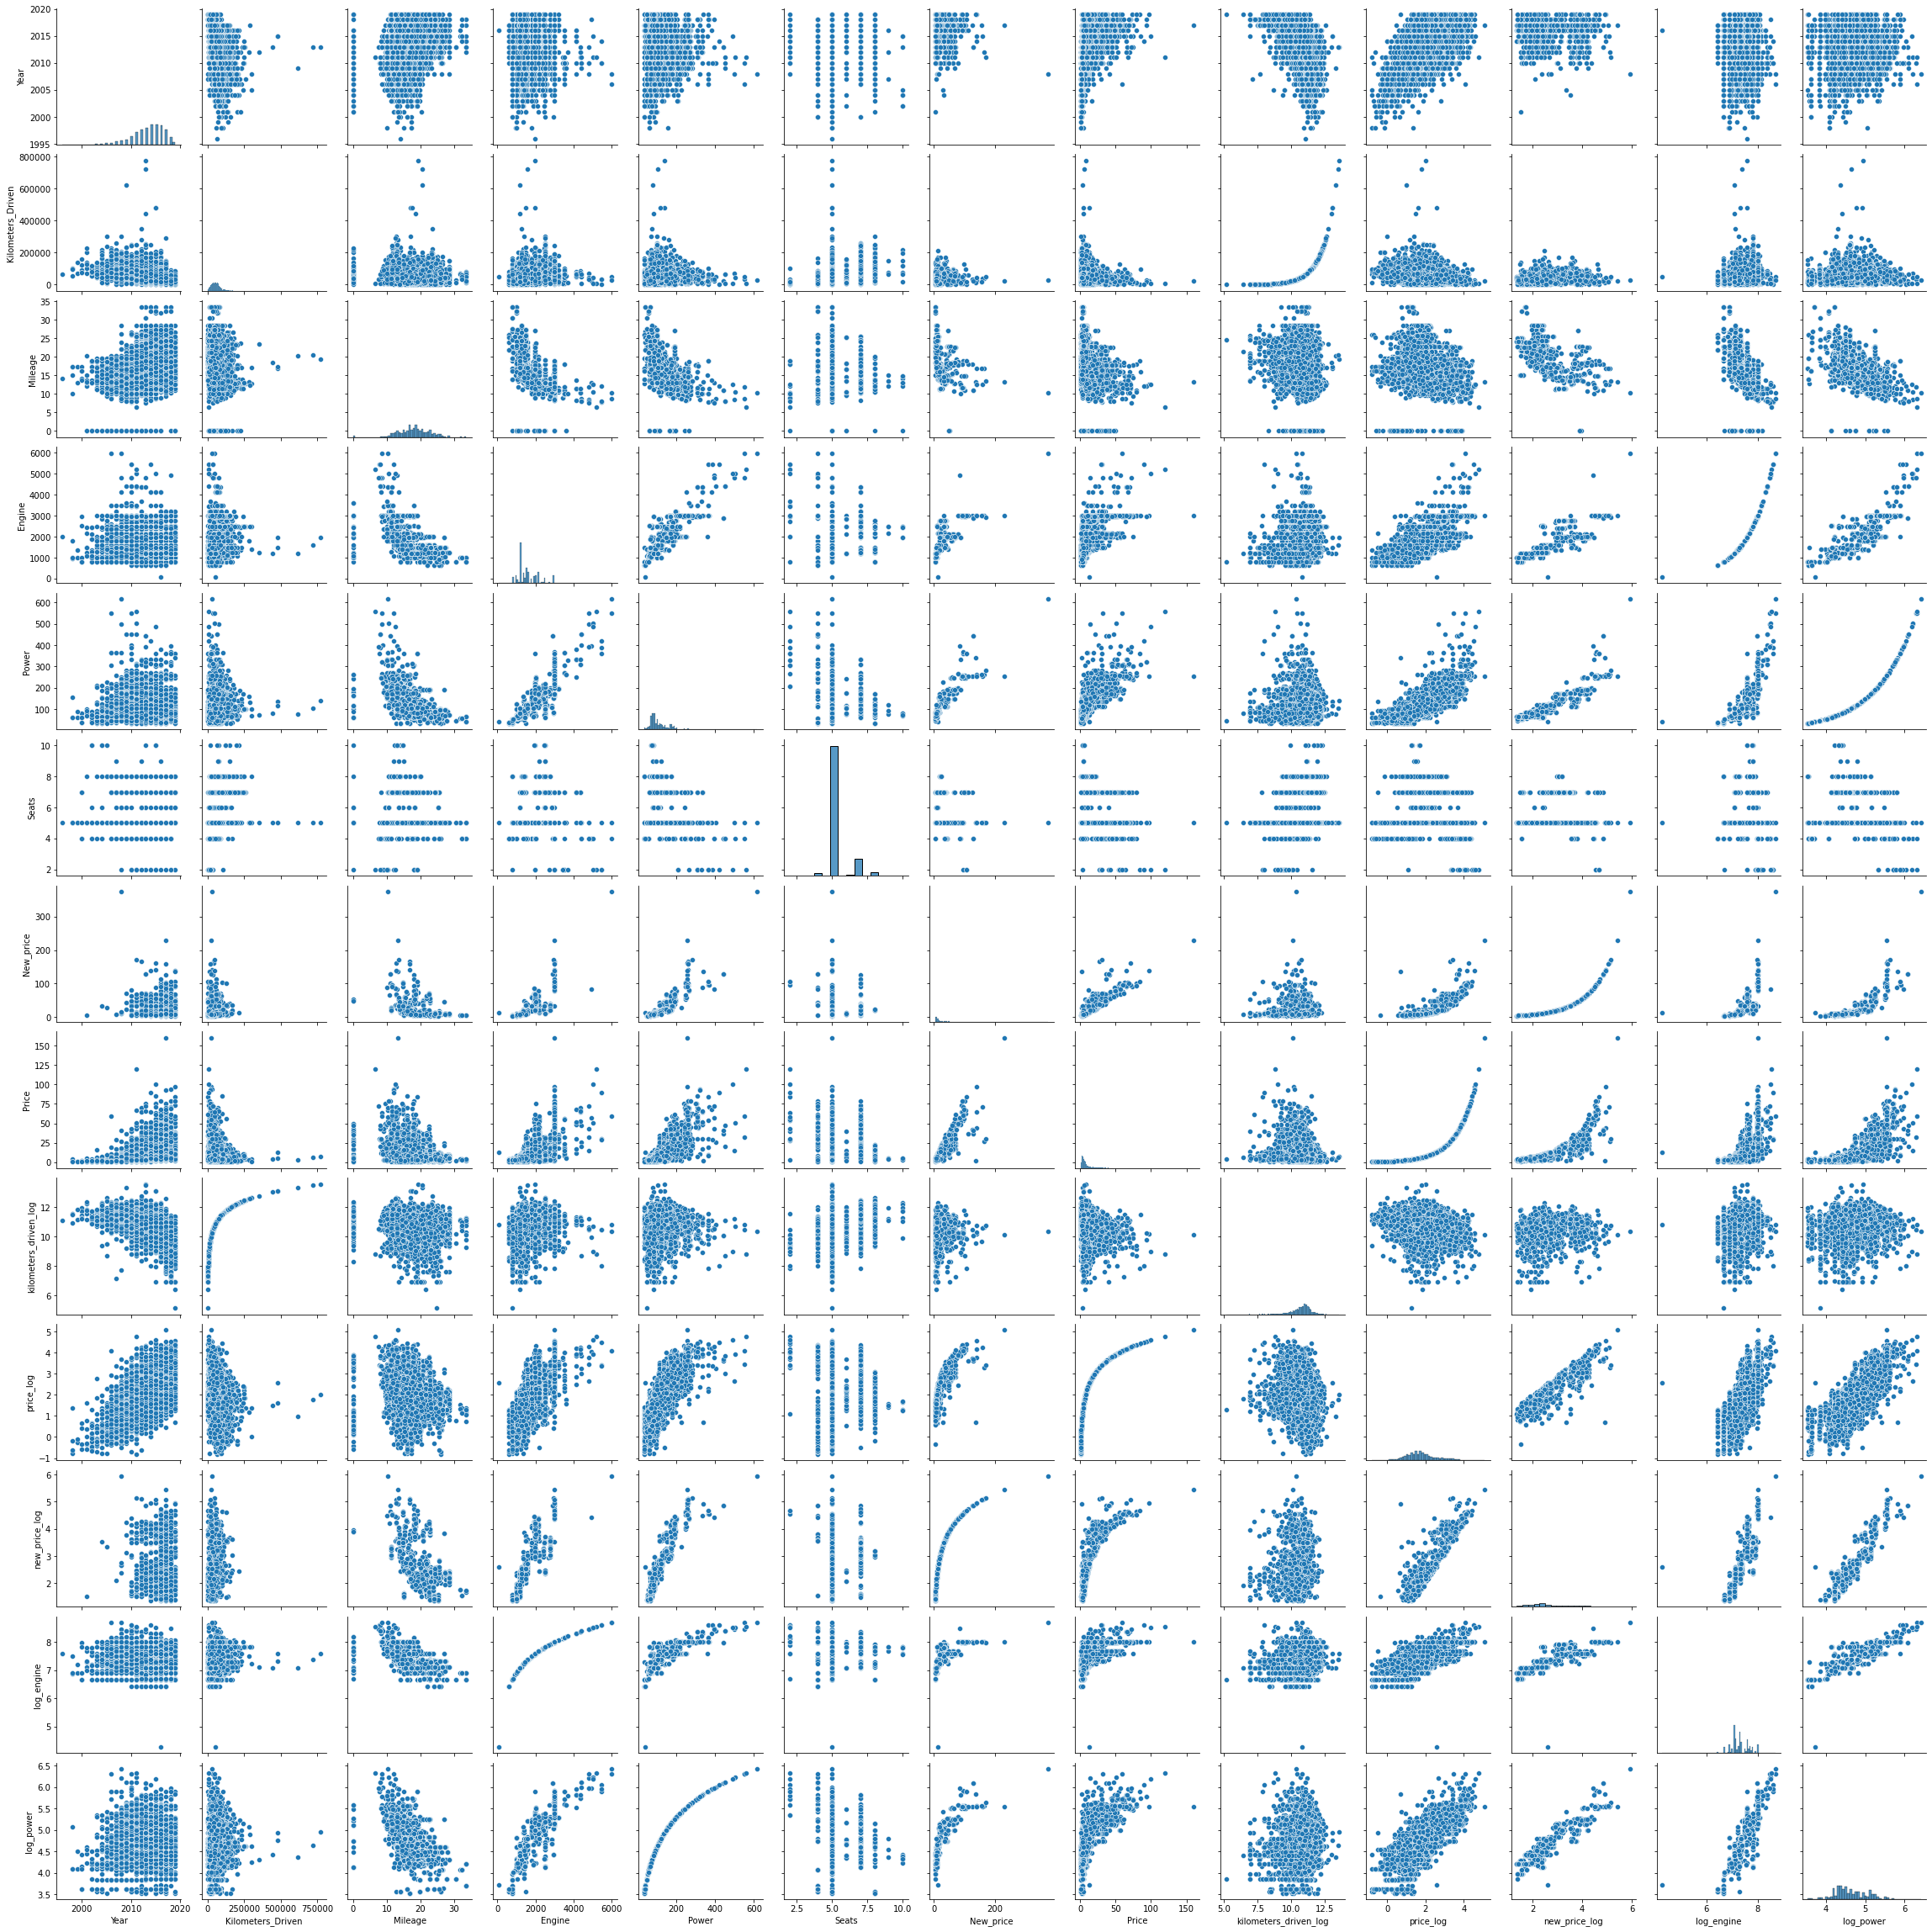

In [48]:
pplot = sns.pairplot(data)
plt.show()

Observations:
- we can clearly see the log values for some of the columns expressed by a log curve
Focusing the observations on the target variables price_log and new_price_log
- the price trends higher as years pass, also trends up with higher engine and power
- new_price_log and the price_log have a strong positve correlation, with visible correlation amoung the 
- Kilometers Driven vs Mileage although should represent similar values kilometers_driven skews left, while mileage looks like a normal graph.
- by applying the log function to the engine and the power it produced more linear relations with regards to the price.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

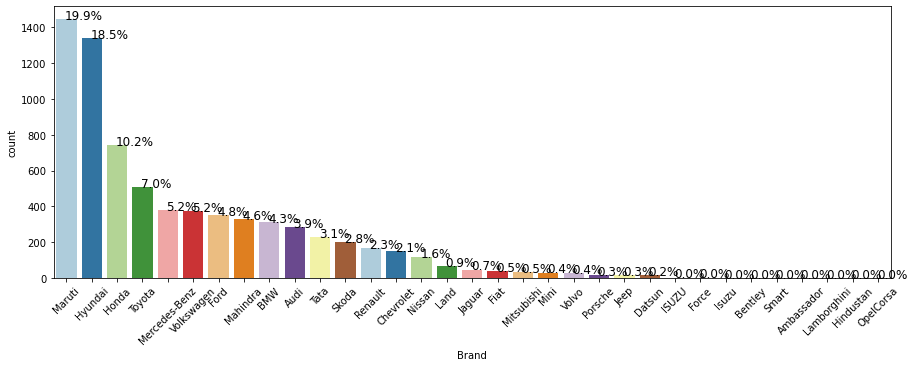

In [49]:
# intialize 2 empty lists
brand = []
car_type = []
# for each row in data split based on the spaces in Name
for row in data.Name:
    # the first element would be the brand name
    brand.append(row.split(' ')[0])
    # the rest of the elements make up the car name and type
    car_type.append(' '.join(row.split(' ')[1:]))
#adding the Brand and the car type to the data dataframe
data["Brand"] = brand
#data["car_type"] = car_type
# filling in the missing perc_on_bar graph that should have been included before
perc_on_bar("Brand")

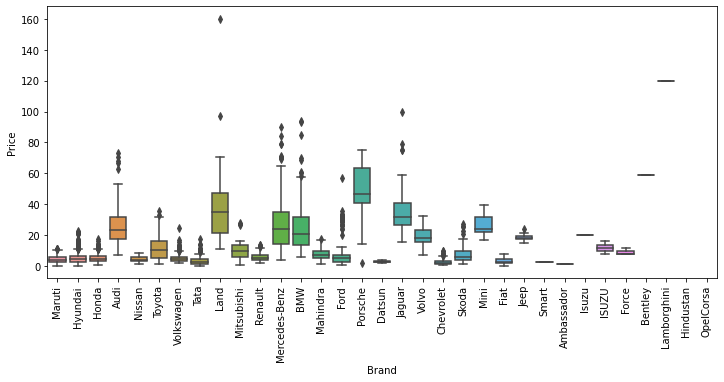

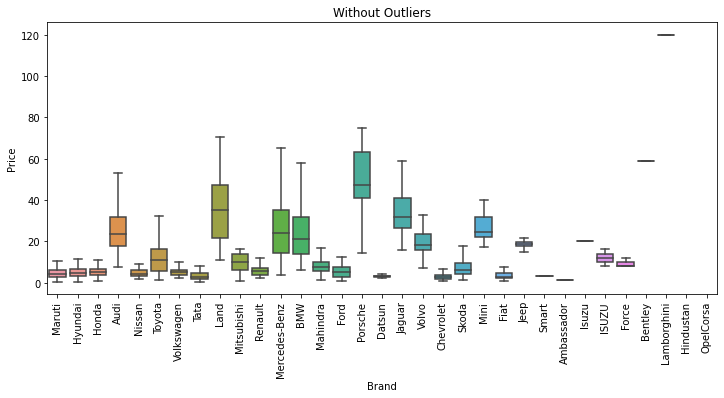

In [50]:
# Box Plot: Price vs Brand
boxplot(data['Brand'])

Observations and Insights: We found that the start of all the names included the brand of the car for the entry. By splitting the values and extracting the first element we can separate the brand of the car. The we are also to tell that the most sold vehicles belongs to the brands Maruti, Hyundai, and Honda. While the brands that are the most expensive are Porsche, Hindustan, Lamborgini, and Land.

### **Missing value treatment**

In [51]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
log_engine                 46
log_power                 175
Brand                       0
dtype: int64

#### **Observations and Insights: Most of the variables are completely filled however there are some variables that have a minor number of variables that are missing data and there are some that are missing a major number of elements such as the Price and the New Price**

**Missing values in Seats**

**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [52]:
# Now check missing values of each column. Hint: Use isnull() method
seatna = data[data["Seats"].isnull()].index.tolist()

In [53]:
# Impute missing values in Seats,you can use fillna method in pandas
temp=0
for ind in seatna:
    ele = ind - 1
    series = pd.Series(data.groupby("Name")["Seats"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["Seats"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["Seats"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "Seats"] = temp
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["Seats"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "Seats"] = temp
    #else:
        data.at[ind, "Seats"] = data["Seats"].median()
    #data["Seats"].fillna(temp, inplace=True, limit = 1)

In [54]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data["Seats"].isnull().sum()

28

**Missing values for Mileage**

In [55]:
# Now check missing values of each column. Hint: Use isnull() method
mileagena = data[data["Mileage"].isnull()].index.tolist()

In [56]:
# Impute missing Mileage. For example, use can use median or any other methods.
temp=0
for ind in mileagena:
    ele = ind - 1
    series = pd.Series(data.groupby("Name")["Mileage"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["Mileage"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["Mileage"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "Mileage"] = temp
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["Mileage"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "Mileage"] = temp
    #else:
        data.at[ind, "Mileage"] = data["Mileage"].median()
    #data["Mileage"].fillna(temp,inplace=True, limit=1)

In [57]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data["Mileage"].isnull().sum()

2

**Missing values for Engine**

In [58]:
enginena = data[data["Engine"].isnull()].index.tolist()

In [59]:
temp=0
for ind in enginena:
    ele = ind -1
    series = pd.Series(data.groupby("Name")["Engine"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["Engine"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["Engine"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "Engine"] = temp
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["Engine"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "Engine"] = temp
    #else:
        data.at[ind, "Engine"] = data["Engine"].median()
    #data["Engine"].fillna(temp,inplace=True, limit =1)

In [60]:
data["Engine"].isnull().sum()

23

**Missing values for Power**

In [61]:
powerna = data[data["Power"].isnull()].index.tolist()
print(len(powerna))

175


In [62]:
temp=0
for ind in powerna:
    ele = ind - 1
    series = pd.Series(data.groupby("Name")["Power"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["Power"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["Power"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "Power"] = temp
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["Power"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "Power"] = temp
    #else:
        data.at[ind, "Power"] = data["Power"].median()
    #data["Power"].fillna(temp,inplace=True, limit=1)

In [63]:
data["Power"].isnull().sum()

55

**Missing values for Power**

In [64]:
price_logna = data[data["price_log"].isnull()].index.tolist()

In [65]:
temp=0
for ind in price_logna:
    ele = ind - 1
    series = pd.Series(data.groupby("Name")["price_log"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["price_log"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["price_log"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "price_log"] = temp
        data.at[ind, "Price"] = np.exp(temp)
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["price_log"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "price_log"] = temp
    #    data.at[ind, "Price"] = np.exp(temp)
    #else:
    #    data.at[ind, "price_log"] = data["price_log"].median()
    #    data.at[ind, "Price"] = np.exp(data["price_log"].median())

In [66]:
data["price_log"].isnull().sum()

178

In [67]:
data["Price"].isnull().sum()

178

Observations for missing values after imputing: As for the missing values for Kilometers Driven, Engine, Power, Price, Seats and Mileage since these are variables that are established during the initial sale of the vehicle that means that they should be standardized. Then that should indicated that we are able to take the median and the means of cars that share the same name to get reasonable values close to what they are originally. We aren't able to completely fill in these values however they should be able to be imputed since there aren't too many missing values.

We should also note that by simply grouping the values together does not create a perfect fill for all row of the dataset. There must be further action taken to fill these spaces.

As for the new price there are too many missing values that will have to intrapolated to find the values.

In [68]:
new_price_logna = data[data["new_price_log"].isnull()].index.tolist()

In [69]:
temp=0
for ind in new_price_logna:
    ele = ind - 1
    series = pd.Series(data.groupby("Name")["new_price_log"].median()[data.iloc[ele]["Name"]])
    series2 = pd.Series(data.groupby("Brand")["new_price_log"].median()[data.iloc[ele]["Brand"]])
    if pd.notna(series[0]):
        temp = data.groupby("Name")["new_price_log"].median()[data.iloc[ele]["Name"]]
        data.at[ind, "new_price_log"] = temp
        data.at[ind, "New_price"] = np.exp(temp)
    #elif pd.notna(series2[0]):
    #    temp = data.groupby("Brand")["new_price_log"].median()[data.iloc[ele]["Brand"]]
    #    data.at[ind, "new_price_log"] = temp
    #    data.at[ind, "New_price"] = np.exp(temp)
    #else:
    #    data.at[ind, "new_price_log"] = data["new_price_log"].median()
    #    data.at[ind, "New_price"] = np.exp(data["new_price_log"].median())

In [70]:
data["new_price_log"].isnull().sum()

1196

In [71]:
# now we make a copy of the completed data set that has only been grouped by cars that only the same name and brand# Assume df_cleaned is the pre-processed data frame in your code, then
data.to_csv("cars_data_grouped.csv", index = False)
# saving a copy of the data to a separate variable
data2 = data.copy()

In [72]:
data2.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     23
Power                      55
Seats                      28
New_price                1196
Price                     178
kilometers_driven_log       0
price_log                 178
new_price_log            1196
log_engine                 46
log_power                 175
Brand                       0
dtype: int64

In [73]:
imputer = KNNImputer(n_neighbors=3)
# we will seperate out the categorical variables to be added back later
placeholder = data.filter(items = ["Name", "Location", "Fuel_Type","Transmission","Owner_Type", "Brand"])
data.drop(columns=["Name", "Location", "Fuel_Type","Transmission","Owner_Type", "Brand"], axis=1 , inplace=True)

test = imputer.fit_transform(data)
temp2 = pd.DataFrame(test, columns = data.columns)
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   7252 non-null   float64
 1   Kilometers_Driven      7252 non-null   float64
 2   Mileage                7252 non-null   float64
 3   Engine                 7252 non-null   float64
 4   Power                  7252 non-null   float64
 5   Seats                  7252 non-null   float64
 6   New_price              7252 non-null   float64
 7   Price                  7252 non-null   float64
 8   kilometers_driven_log  7252 non-null   float64
 9   price_log              7252 non-null   float64
 10  new_price_log          7252 non-null   float64
 11  log_engine             7252 non-null   float64
 12  log_power              7252 non-null   float64
dtypes: float64(13)
memory usage: 736.7 KB


In [74]:
# confirming the placeholder 
placeholder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          7252 non-null   object
 1   Location      7252 non-null   object
 2   Fuel_Type     7252 non-null   object
 3   Transmission  7252 non-null   object
 4   Owner_Type    7252 non-null   object
 5   Brand         7252 non-null   object
dtypes: object(6)
memory usage: 654.6+ KB


In [75]:
# combining the categorical and numeric data
data = pd.concat([temp2, placeholder], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   7252 non-null   float64
 1   Kilometers_Driven      7252 non-null   float64
 2   Mileage                7252 non-null   float64
 3   Engine                 7252 non-null   float64
 4   Power                  7252 non-null   float64
 5   Seats                  7252 non-null   float64
 6   New_price              7252 non-null   float64
 7   Price                  7252 non-null   float64
 8   kilometers_driven_log  7252 non-null   float64
 9   price_log              7252 non-null   float64
 10  new_price_log          7252 non-null   float64
 11  log_engine             7252 non-null   float64
 12  log_power              7252 non-null   float64
 13  Name                   7252 non-null   object 
 14  Location               7252 non-null   object 
 15  Fuel

In [76]:
# now we make a copy of the completed data set that has only been grouped by cars that only the same name and brand
# Assume df_cleaned is the pre-processed data frame in your code
data.to_csv("cars_data_imputed.csv", index = False)

In [77]:
data2.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     23
Power                      55
Seats                      28
New_price                1196
Price                     178
kilometers_driven_log       0
price_log                 178
new_price_log            1196
log_engine                 46
log_power                 175
Brand                       0
dtype: int64

In [78]:
# Now we re-create the data-set used for original analysis
data2.dropna(subset=["new_price_log"], inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6056 entries, 2 to 7252
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6056 non-null   object 
 1   Location               6056 non-null   object 
 2   Year                   6056 non-null   int64  
 3   Kilometers_Driven      6056 non-null   int64  
 4   Fuel_Type              6056 non-null   object 
 5   Transmission           6056 non-null   object 
 6   Owner_Type             6056 non-null   object 
 7   Mileage                6055 non-null   float64
 8   Engine                 6056 non-null   float64
 9   Power                  6056 non-null   float64
 10  Seats                  6056 non-null   float64
 11  New_price              6056 non-null   float64
 12  Price                  6004 non-null   float64
 13  kilometers_driven_log  6056 non-null   float64
 14  price_log              6004 non-null   float64
 15  new_

In [79]:
placeholder2 = data2.filter(items = ["Name", "Location", "Fuel_Type","Transmission","Owner_Type", "Brand"])
data2.drop(columns=["Name", "Location", "Fuel_Type","Transmission","Owner_Type", "Brand"], axis=1 , inplace=True)

test2 = imputer.fit_transform(data2)
tempor = pd.DataFrame(test2, columns = data2.columns)

data2 = pd.concat([tempor, placeholder2], axis=1)

data2.to_csv("cars_data_true.csv", index = False)

In [80]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6981 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6056 non-null   float64
 1   Kilometers_Driven      6056 non-null   float64
 2   Mileage                6056 non-null   float64
 3   Engine                 6056 non-null   float64
 4   Power                  6056 non-null   float64
 5   Seats                  6056 non-null   float64
 6   New_price              6056 non-null   float64
 7   Price                  6056 non-null   float64
 8   kilometers_driven_log  6056 non-null   float64
 9   price_log              6056 non-null   float64
 10  new_price_log          6056 non-null   float64
 11  log_engine             6056 non-null   float64
 12  log_power              6056 non-null   float64
 13  Name                   6056 non-null   object 
 14  Location               6056 non-null   object 
 15  Fuel

## Removing Multicolinearity

In [81]:
# we change the name of the variable to reflect the functionality of the rest of the document
data_updated = data2.copy()

In [82]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [83]:
trim_data = data_updated.copy()
place_hold = data_updated.copy()
# we drop the target variable
trim_data.drop(columns=["Price", "price_log"], axis=1, inplace=True)

# we drop the columns that created derived variables
trim_data.drop(columns=["Name", "Engine", "Power", "New_price", "Kilometers_Driven"], axis=1, inplace=True)
trim_data.dropna(inplace=True)

trim_data =pd.get_dummies(trim_data, drop_first=True) 

scaler = StandardScaler()
trim_data_scaled = scaler.fit_transform(trim_data)
trim_data_scaled = pd.DataFrame(trim_data_scaled, index = trim_data.index, columns = trim_data.columns)
#trim_data_scaled = trim_data

In [84]:
vif_series = pd.Series(
    [variance_inflation_factor(trim_data_scaled.values, i) for i in range(trim_data_scaled.shape[1])],
    index = trim_data_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

Year                           1.686138
Mileage                        1.802149
Seats                          1.702486
kilometers_driven_log          1.488946
new_price_log                  1.103171
log_engine                     7.253952
log_power                      6.154359
Location_Bangalore             2.500118
Location_Chennai               2.899520
Location_Coimbatore            3.550094
Location_Delhi                 3.100882
Location_Hyderabad             3.701773
Location_Jaipur                2.635871
Location_Kochi                 3.504026
Location_Kolkata               3.132619
Location_Mumbai                3.990536
Location_Pune                  3.374680
Fuel_Type_Diesel              28.430721
Fuel_Type_Electric             1.032259
Fuel_Type_LPG                  1.109941
Fuel_Type_Petrol              28.021105
Transmission_Manual            2.041339
Owner_Type_Fourth & Above      1.006043
Owner_Type_Second              1.080658
Owner_Type_Third          

In [85]:
trim_data_scaled.drop(columns=["Brand_Maruti", "log_engine", "kilometers_driven_log"], axis=1, inplace=True)

vif_series = pd.Series(
    [variance_inflation_factor(trim_data_scaled.values, i) for i in range(trim_data_scaled.shape[1])],
    index = trim_data_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

Year                          1.206202
Mileage                       1.716885
Seats                         1.156592
new_price_log                 1.102897
log_power                     1.538672
Location_Bangalore            2.498825
Location_Chennai              2.898190
Location_Coimbatore           3.549698
Location_Delhi                3.099853
Location_Hyderabad            3.701574
Location_Jaipur               2.635571
Location_Kochi                3.503978
Location_Kolkata              3.132282
Location_Mumbai               3.990459
Location_Pune                 3.374326
Fuel_Type_Diesel             28.407753
Fuel_Type_Electric            1.031669
Fuel_Type_LPG                 1.109758
Fuel_Type_Petrol             27.989373
Transmission_Manual           2.039148
Owner_Type_Fourth & Above     1.005940
Owner_Type_Second             1.080498
Owner_Type_Third              1.050798
Brand_Audi                    1.591857
Brand_BMW                     1.615145
Brand_Chevr

In [86]:
trim_data_scaled.drop(columns=["Fuel_Type_Diesel"], axis=1, inplace=True)

vif_series = pd.Series(
    [variance_inflation_factor(trim_data_scaled.values, i) for i in range(trim_data_scaled.shape[1])],
    index = trim_data_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

Year                         1.206202
Mileage                      1.716580
Seats                        1.156330
new_price_log                1.102872
log_power                    1.538614
Location_Bangalore           2.498506
Location_Chennai             2.897784
Location_Coimbatore          3.549097
Location_Delhi               3.099061
Location_Hyderabad           3.700127
Location_Jaipur              2.633354
Location_Kochi               3.503737
Location_Kolkata             3.130878
Location_Mumbai              3.987681
Location_Pune                3.373652
Fuel_Type_Electric           1.008857
Fuel_Type_LPG                1.006785
Fuel_Type_Petrol             1.364012
Transmission_Manual          2.038112
Owner_Type_Fourth & Above    1.005935
Owner_Type_Second            1.080204
Owner_Type_Third             1.050748
Brand_Audi                   1.580677
Brand_BMW                    1.602831
Brand_Chevrolet              1.081275
Brand_Datsun                 1.01302

# Milestone 2

In [87]:
# we will require the sklearn library:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [196]:
cars_data = pd.read_csv("cars_data_true.csv")
# just to be sure
cars_data.dropna(inplace=True)
cars_data_imput = pd.read_csv("cars_data_imputed.csv")
cars_data_imput.dropna(inplace=True)

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

I have also applied the standard scaler to the dataset due to the back when I remove the multicolinearity from the dataset it was also standard scaled
So the retain that property we also scale the data here. To get the data out we will have to take the inverse of the standard scaler to get the results.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?
We are dropping those values because those are the columns that we used to create log values for them and we remove them to remove multicolinearity

In [197]:
# Step-1
X = cars_data.drop(['Name','Price','price_log'], axis = 1)
y = cars_data[["price_log", "Price"]]

X_imput = cars_data_imput.drop(['Name','Price','price_log'], axis = 1)
y_imput = cars_data_imput[["price_log", "Price"]]


In [198]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)
X_imput = pd.get_dummies(X_imput, drop_first = True)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled = X
X_scaled_imput = X_imput

# now to remove the multicolinearity
X_scaled.drop(columns=["Engine", "Power", "New_price", "Kilometers_Driven", "Brand_Maruti", "log_engine", 
                       "kilometers_driven_log", "Fuel_Type_Diesel"],inplace=True)
X_scaled_imput.drop(columns=["Engine", "Power", "New_price", "Kilometers_Driven", "Brand_Maruti", "log_engine", 
                       "kilometers_driven_log", "Fuel_Type_Diesel", "Brand_Bentley", "Brand_Force", "Brand_Hindustan",
                            "Brand_ISUZU", "Brand_Lamborghini", "Brand_OpelCorsa"],inplace=True)

In [207]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
X_train_imput, X_test_imput, y_train_imput, y_test_imput= train_test_split(X_scaled_imput, y_imput, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)
print(X_train_imput.shape, X_test_imput.shape)

(3591, 47) (1540, 47)
(5075, 47) (2176, 47)


In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 775 to 237
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       3591 non-null   float64
 1   Mileage                    3591 non-null   float64
 2   Seats                      3591 non-null   float64
 3   new_price_log              3591 non-null   float64
 4   log_power                  3591 non-null   float64
 5   Location_Bangalore         3591 non-null   uint8  
 6   Location_Chennai           3591 non-null   uint8  
 7   Location_Coimbatore        3591 non-null   uint8  
 8   Location_Delhi             3591 non-null   uint8  
 9   Location_Hyderabad         3591 non-null   uint8  
 10  Location_Jaipur            3591 non-null   uint8  
 11  Location_Kochi             3591 non-null   uint8  
 12  Location_Kolkata           3591 non-null   uint8  
 13  Location_Mumbai            3591 non-null   uint

In [93]:
X_train_imput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5077 entries, 62 to 5157
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5077 non-null   float64
 1   Mileage                    5077 non-null   float64
 2   Seats                      5077 non-null   float64
 3   new_price_log              5077 non-null   float64
 4   log_power                  5077 non-null   float64
 5   Location_Bangalore         5077 non-null   uint8  
 6   Location_Chennai           5077 non-null   uint8  
 7   Location_Coimbatore        5077 non-null   uint8  
 8   Location_Delhi             5077 non-null   uint8  
 9   Location_Hyderabad         5077 non-null   uint8  
 10  Location_Jaipur            5077 non-null   uint8  
 11  Location_Kochi             5077 non-null   uint8  
 12  Location_Kolkata           5077 non-null   uint8  
 13  Location_Mumbai            5077 non-null   uint

In [94]:
def create_scatter(prediction):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test['price_log'], prediction)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()
    
def create_scatter_imput(prediction):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_imput['price_log'], prediction)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [95]:
 def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')    
    

# Calling Method 
#plot_grid_search(pipe_grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

In [209]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

def get_model_score_imput(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train_imput = model.predict(X_train_imput)
    
    pred_train_imput_ = np.exp(pred_train_imput)
    
    pred_test_imput = model.predict(X_test_imput)
    
    pred_test_imput_ = np.exp(pred_test_imput)
    
    train_r2 = metrics.r2_score(y_train_imput['Price'], pred_train_imput_)
    
    test_r2 = metrics.r2_score(y_test_imput['Price'], pred_test_imput_)
    
    train_rmse = metrics.mean_squared_error(y_train_imput['Price'], pred_train_imput_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test_imput['Price'], pred_test_imput_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train_imput['Price'], pred_train_imput_))
        
        print("R-square on test set : ", metrics.r2_score(y_test_imput['Price'], pred_test_imput_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train_imput['Price'], pred_train_imput_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test_imput['Price'], pred_test_imput_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [97]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [98]:
# Create a linear regression model
lr = LinearRegression()

In [99]:
# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 

LinearRegression()

In [100]:
# Get score of the model
LR_score = get_model_score(lr)

R-square on training set :  0.7395204229094722
R-square on test set :  0.7546742123851495
RMSE on training set :  5.608260225173003
RMSE on test set :  5.203630347860879


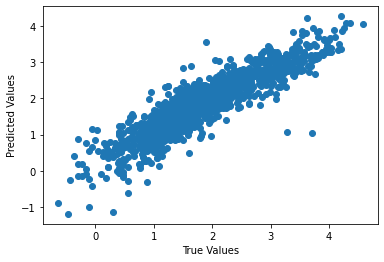

In [101]:
lin_predict = lr.predict(X_test)
create_scatter(lin_predict)

In [102]:
mean_absolute_error(y_test['price_log'], lin_predict)

0.28088649104501584

**Observations from results:  We see that this prediction turned out pretty well since the R-squared values for both training and test sets are close. As for the RMSE we can see it too bad however it could be better. For this data set the prediction did a little better than the training. Next looking that the MAE the result is small but since the result should be in as a log it is good since this indicates a smaller amount of error at lower values**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [103]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     386.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:28:04   Log-Likelihood:                -1327.1
No. Observations:                3591   AIC:                             2748.
Df Residuals:                    3544   BIC:                             3039.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [104]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [105]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Brand_Isuzu,-0.711226,4.456532e-02
new_price_log,0.071141,7.014754e-11
Seats,0.061805,3.210955e-14
Year,0.119479,0.000000e+00
log_power,1.575575,0.000000e+00
const,-246.517430,0.000000e+00


In [106]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Brand', 'new_price_log', 'Seats', 'Year', 'kilometers_driven_log', 'price_log', 'log_engine', 'log_power']


**Observations: Based on the observations of the OLS model the Brand is the most important factor followed by the  new_price**

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [107]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [108]:
# Create a Ridge regression model
rid_model_tuned = Ridge()

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
parameters = {'alpha': (np.linspace(-8, 8, 100))}

scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(rid_model_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rid_model_tuned = grid_obj.best_estimator_


In [109]:
# Fit Ridge regression model
rid_model_tuned.fit(X_train, y_train['price_log'])

Ridge(alpha=7.353535353535355)

In [110]:
# Get score of the model
Rid_model = get_model_score(rid_model_tuned)

R-square on training set :  0.7356562526525154
R-square on test set :  0.7517032760393692
RMSE on training set :  5.64970587490658
RMSE on test set :  5.235043945283787


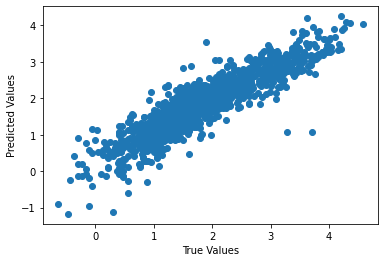

In [111]:
rid_predict = rid_model_tuned.predict(X_test)
#apply_confusion(rid_predict)
create_scatter(rid_predict)
#plot_grid_search(grid_obj.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

In [112]:
mean_absolute_error(y_test['price_log'], rid_predict)

0.28057828050262124

**Observations from results:  We see that this prediction turned out pretty well pretty much the same as the linear regression. since the R-squared values for both training and test sets are close. As for the RMSE we can see it too bad however it could be better. For this data set the prediction did a little better than the training. Next looking that the MAE the result is small but since the result should be in as a log it is good since this indicates a smaller amount of error at lower values**

## Lasso Regression

In [113]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Lasso

In [114]:
# Create a Lasso regression model
lasso_model_tuned = Lasso(normalize=True)

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
parameters = {'alpha': (np.logspace(-8, 8, 100))}

scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(lasso_model_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
lasso_model_tuned = grid_obj.best_estimator_


In [115]:
# Fit Ridge regression model
lasso_model_tuned.fit(X_train, y_train['price_log'])

Lasso(alpha=0.0001592282793341094, normalize=True)

In [116]:
# Get score of the model
Lasso_model = get_model_score(lasso_model_tuned)

R-square on training set :  0.7308183552678846
R-square on test set :  0.7501211725993266
RMSE on training set :  5.701170627510312
RMSE on test set :  5.251695855339786


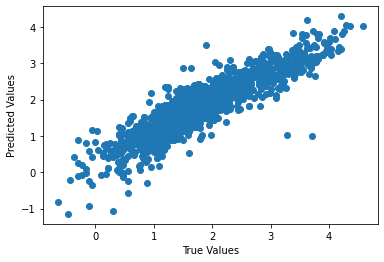

In [117]:
lasso_predict = lasso_model_tuned.predict(X_test)
create_scatter(lasso_predict)

In [118]:
mean_absolute_error(y_test['price_log'], lasso_predict)

0.2785726766129257

**Observations: Compared to Ridge and Linear regression its seems to do as well while doing worse on RMSE, and slightly better for the mean_absolute error it appear about identical to the previous models. But the mean absolute error is down a bit**

## ElasticNet
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
# Choose the type of estimator 
elastic_tuned = ElasticNet(random_state = 0)

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
parameters = {'alpha':(np.logspace(-8, 8, 50)),
              'l1_ratio': np.linspace(0,1, 50)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(elastic_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
elastic_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
elastic_tuned.fit(X_train, y_train['price_log'])

ElasticNet(alpha=0.0035564803062231283, l1_ratio=1.0, random_state=0)

In [121]:
# Fit Ridge regression model
elastic_tuned.fit(X_train, y_train['price_log'])

ElasticNet(alpha=0.0035564803062231283, l1_ratio=1.0, random_state=0)

In [122]:
# Get score of the model
Elastic_model = get_model_score(lasso_model_tuned)

R-square on training set :  0.7308183552678846
R-square on test set :  0.7501211725993266
RMSE on training set :  5.701170627510312
RMSE on test set :  5.251695855339786


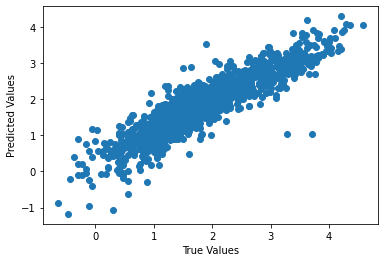

In [123]:
elastic_predict = elastic_tuned.predict(X_test)
create_scatter(elastic_predict)

In [124]:
mean_absolute_error(y_test['price_log'], elastic_predict)

0.2792797974325878

**Observations: This model does slightly worse than the Lasso model regarding the mean_absolute error however it does pretty much the same regarding the other metrics that we have list here when predicting the log_price**

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [125]:
# Import Decision tree for Regression from sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [126]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(max_depth = 5)

In [127]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'].ravel())

DecisionTreeRegressor(max_depth=5)

In [128]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-square on training set :  0.8315974014099741
R-square on test set :  0.7874880456227604
RMSE on training set :  4.509368348328402
RMSE on test set :  4.843134382729146


**Observations from results: The decision tree model actually does better overall, however we can also see there is a significant difference between the training and testing set, this may indicate overtunning we will lok into this further after tuning**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [129]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
log_power                  0.775517
Year                       0.209680
Mileage                    0.012977
Seats                      0.001163
new_price_log              0.000663
Brand_Mini                 0.000000
Brand_Honda                0.000000
Brand_Hyundai              0.000000
Brand_Isuzu                0.000000
Brand_Jaguar               0.000000
Brand_Jeep                 0.000000
Brand_Land                 0.000000
Brand_Mahindra             0.000000
Brand_Mercedes-Benz        0.000000
Brand_Nissan               0.000000
Brand_Mitsubishi           0.000000
Brand_Fiat                 0.000000
Brand_Porsche              0.000000
Brand_Renault              0.000000
Brand_Skoda                0.000000
Brand_Smart                0.000000
Brand_Tata                 0.000000
Brand_Toyota               0.000000
Brand_Volkswagen           0.000000
Brand_Ford                 0.000000
Brand_BMW                  0.000000
Brand_Datsun               0

**Observations and insights: Based on the decision tree the log_power followed by the year has the largest effect on the price of the vehicle. The next factors are the Mileage and the new price**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [130]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [131]:
# Create a Randomforest regression model
random_forest_model = RandomForestRegressor()

In [132]:
# Fit Randomforest regression model
random_forest_model.fit(X_train, y_train["price_log"])

RandomForestRegressor()

In [133]:
# Get score of the model
rand_for_model = get_model_score(random_forest_model)

R-square on training set :  0.9636143131523528
R-square on test set :  0.8180774096642254
RMSE on training set :  2.0960739785592453
RMSE on test set :  4.481033106239314


**Observations and insights: The Random Forest method produces even more stellar results given, but there is a discrepency regarding the training and test datasets where there is a larger gap than decision trees. This means that even with this base of random forest it is over training.**

**Feature Importance**

In [134]:
# Print important features similar to decision trees
print(pd.DataFrame(random_forest_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
log_power                  0.697295
Year                       0.201113
Mileage                    0.033712
new_price_log              0.023653
Seats                      0.010276
Fuel_Type_Petrol           0.002242
Location_Pune              0.001766
Location_Kochi             0.001690
Transmission_Manual        0.001624
Owner_Type_Second          0.001611
Brand_Hyundai              0.001579
Location_Hyderabad         0.001506
Location_Kolkata           0.001504
Location_Mumbai            0.001503
Location_Chennai           0.001483
Brand_Toyota               0.001404
Location_Delhi             0.001384
Location_Coimbatore        0.001269
Brand_Honda                0.001212
Location_Bangalore         0.001137
Brand_Volkswagen           0.001123
Brand_Mercedes-Benz        0.001065
Location_Jaipur            0.000945
Brand_BMW                  0.000940
Brand_Ford                 0.000936
Brand_Mahindra             0.000749
Brand_Tata                 0

**Observations and insights: Random forest has the same top contributors for price as the decision trees. But there are alt more significant variables to take into account.**

### **Hyperparameter Tuning: Decision Tree**

In [135]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parameters that the model takes and play with those
parameters = {'max_depth':[4, 6, 8, 10, None],
              'max_features': ['sqrt','log2',None]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=6, random_state=1)

In [136]:
# Get score of the dtree_tuned
Dtree_model_tuned = get_model_score(dtree_tuned)

R-square on training set :  0.8636019523344749
R-square on test set :  0.7640456912582096
RMSE on training set :  4.058311650654929
RMSE on test set :  5.103272900794806


**Observations and insights: From the base decision tree it appears that the results improved slightly compared to before the tuning, but it appears that the RMSE for both the training and test sets have not improved**

**Feature Importance**

In [137]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
log_power                  0.761886
Year                       0.210344
Mileage                    0.016147
new_price_log              0.008768
Seats                      0.002337
Brand_Jaguar               0.000454
Owner_Type_Second          0.000064
Brand_Mercedes-Benz        0.000000
Brand_Honda                0.000000
Brand_Hyundai              0.000000
Brand_Isuzu                0.000000
Brand_Jeep                 0.000000
Brand_Land                 0.000000
Brand_Mahindra             0.000000
Brand_Mitsubishi           0.000000
Brand_Mini                 0.000000
Brand_Fiat                 0.000000
Brand_Nissan               0.000000
Brand_Porsche              0.000000
Brand_Renault              0.000000
Brand_Skoda                0.000000
Brand_Smart                0.000000
Brand_Tata                 0.000000
Brand_Toyota               0.000000
Brand_Volkswagen           0.000000
Brand_Ford                 0.000000
Brand_BMW                  0

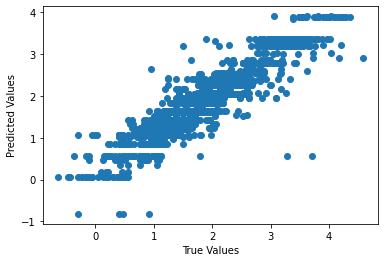

In [138]:
dtree_tuned_predict = dtree_tuned.predict(X_test)
create_scatter(dtree_tuned_predict)

In [139]:
mean_absolute_error(y_test['price_log'], dtree_tuned_predict)

0.24718542652893535

**Observations and insights: The scatter plot look some what strange, but overall the results still look better than linear regression, the MAE is lower than before and the results of the Rsquared value hasn't changed much compared to the untuned version.**

### **Hyperparameter Tuning: Random Forest**

In [140]:
# Choose the type of Regressor
rad_forest_tuned = RandomForestRegressor(random_state = 1)
# Define the parameters for Grid to choose from 
parameters = {'max_depth':[4, 6, 8, 10, None],
              'max_features': ['sqrt','log2',None],
              'n_estimators': [80, 90, 100, 110, 120]}

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rad_forest_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
rad_forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rad_forest_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [141]:
# Get score of the model
Dtree_model_tuned = get_model_score(rad_forest_tuned)

R-square on training set :  0.9637231551940817
R-square on test set :  0.8239086449660464
RMSE on training set :  2.092936593246372
RMSE on test set :  4.408632060859601


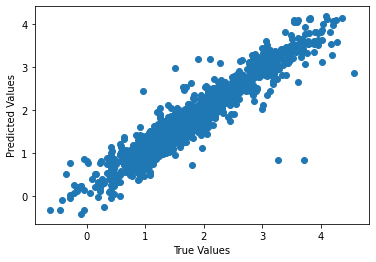

In [142]:
rad_forest_tuned_predict = rad_forest_tuned.predict(X_test)
create_scatter(rad_forest_tuned_predict)

In [143]:
mean_absolute_error(y_test['price_log'], dtree_tuned_predict)

0.24718542652893535

In [144]:
from sklearn import tree
from sklearn.tree import export_graphviz
import os

[Text(0.5657593275192787, 0.9833333333333333, 'log_power <= 4.898\nsquared_error = 0.702\nsamples = 2260\nvalue = 1.854'),
 Text(0.293028810988091, 0.95, 'Year <= 2012.5\nsquared_error = 0.316\nsamples = 1679\nvalue = 1.506'),
 Text(0.10380548110667756, 0.9166666666666666, 'log_power <= 4.285\nsquared_error = 0.255\nsamples = 539\nvalue = 1.038'),
 Text(0.03166714741278464, 0.8833333333333333, 'Year <= 2010.5\nsquared_error = 0.189\nsamples = 156\nvalue = 0.643'),
 Text(0.013737320321138407, 0.85, 'log_power <= 4.126\nsquared_error = 0.162\nsamples = 91\nvalue = 0.453'),
 Text(0.008268833229171674, 0.8166666666666667, 'Mileage <= 18.5\nsquared_error = 0.118\nsamples = 19\nvalue = 0.047'),
 Text(0.00551255548611445, 0.7833333333333333, 'Brand_Hyundai <= 0.5\nsquared_error = 0.087\nsamples = 12\nvalue = -0.084'),
 Text(0.003845968943800779, 0.75, 'new_price_log <= 2.516\nsquared_error = 0.065\nsamples = 10\nvalue = 0.012'),
 Text(0.0020511834366937487, 0.7166666666666667, 'Mileage <= 17.

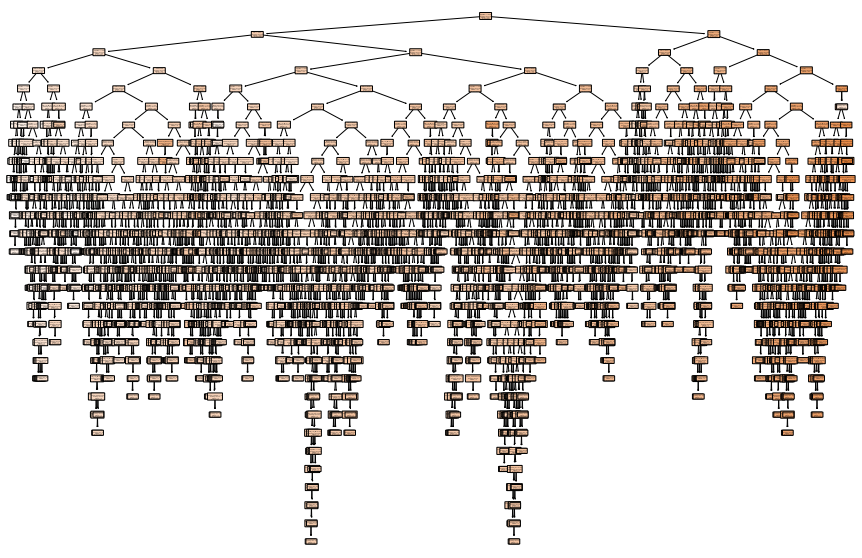

In [145]:
# first attempt
#out = tree.plot_tree(rad_forest_tuned, fontsize = 10, max_depth = 5, impurity = False, filled = True, feature_names = X_train.columns, class_names = True)
# second attempt
count = 0
#for tree in rad_forest_tuned.estimators_:
#    export_graphviz(tree,
#                feature_names=X_train.columns,
#                filled=True,
#                rounded=True)
#    count += 1
#    print('dot -Tpng tree.dot -o tree{t_num}.png'.format(t_num = count))
#    os.system('dot -Tpng tree.dot -o tree{t_num}.png'.format(t_num = count))
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(rad_forest_tuned.estimators_[0], 
          feature_names=X_train.columns,
          class_names=y_train.columns, 
          filled=True, impurity=True, 
          rounded=True)

**Observations and insights:  The hyper tuning of the random forest produces a better scatter than the tuned decision tree and we also see that the training sets performed very well. However there is a great dip in performance in test sets, indicating that his model has been overfitted and additional steps should be taken to reduce this factor. But the resutls of the test set up still more accurate than the regression methods**

**Feature Importance**

In [146]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rad_forest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
log_power                  0.698079
Year                       0.201473
Mileage                    0.033002
new_price_log              0.023373
Seats                      0.010519
Fuel_Type_Petrol           0.002056
Location_Pune              0.001680
Location_Kochi             0.001642
Brand_Hyundai              0.001638
Owner_Type_Second          0.001606
Location_Kolkata           0.001599
Transmission_Manual        0.001588
Location_Mumbai            0.001588
Brand_Toyota               0.001583
Location_Hyderabad         0.001469
Location_Delhi             0.001386
Location_Chennai           0.001300
Location_Coimbatore        0.001282
Brand_Honda                0.001233
Location_Bangalore         0.001147
Brand_Volkswagen           0.001073
Brand_Mercedes-Benz        0.000910
Brand_BMW                  0.000906
Location_Jaipur            0.000874
Brand_Ford                 0.000862
Brand_Tata                 0.000737
Brand_Mahindra             0

**Observations and insights:  Similar to the last importance  reading that the log-power remains the most influencial about the log_price. There are alot of variables that this model cares about however this model is also overtuned based on the readings from the Rsquared reading from training and test sets.**

## KNNRegressor

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
# Choose the type of Regressor
knn_tuned = KNeighborsRegressor()
# Define the parameters for Grid to choose from 
parameters = {'n_neighbors':[2, 3, 4, 5, 6, 8, 10],
              'weights': ['uniform', 'distance']}

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(knn_tuned, parameters, scoring=scorer, n_jobs = -1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
knn_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
knn_tuned.fit(X_train, y_train['price_log'])

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [149]:
# Get score of the model
knn_model_tuned = get_model_score(knn_tuned)

R-square on training set :  0.9998988941720683
R-square on test set :  0.519604010818248
RMSE on training set :  0.11049163821286943
RMSE on test set :  7.281729190379406


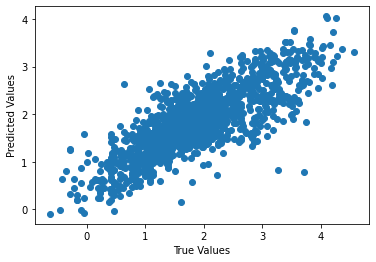

In [150]:
knn_tuned_predict = knn_tuned.predict(X_test)
create_scatter(knn_tuned_predict)

In [151]:
mean_absolute_error(y_test['price_log'], knn_tuned_predict)

0.3787875874125007

**Observations and insights: The knn model is the most accurate model here on the training data, however it massively drops off for the testing data. This makes the model even more overtuned than the random forest decision tree**

In [152]:
# Defining list of models you have trained
models = [lr, dtree, rid_model_tuned, lasso_model_tuned, elastic_tuned, dtree_tuned, rad_forest_tuned, knn_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [153]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Ridge', 'Lasso', 'ElasticNet', 'Decision Tree Tuned', 'Random Forest Tuned', 'KNN Regressor'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.739520,0.754674,5.608260,5.203630
1,Decision Tree,0.831597,0.787488,4.509368,4.843134
2,Ridge,0.735656,0.751703,5.649706,5.235044
3,Lasso,0.730818,0.750121,5.701171,5.251696
4,ElasticNet,0.732668,0.753339,5.681550,5.217768
5,Decision Tree Tuned,0.863602,0.764046,4.058312,5.103273
6,Random Forest Tuned,0.963723,0.823909,2.092937,4.408632
7,KNN Regressor,0.999899,0.519604,0.110492,7.281729


**Observations: The most of heavily overtuned models are the one invovled with some category, like decision tree. The regression models also look fairly consistent but overall fall behind any of the Decision Tree models and KNN.**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
I tried both the standard scaler and without it to test all the models. The scaler had no visible effect on any of the results.
after removing the multicolinearity columns from part 1 the regression model acted very similarly.
The decision trees although over tuned performed better overall regardless of the them being overtuned


**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
First about the linear regression models lr, Lasso, ElasticNet and Ridge. All of these models performed very similarily and returned almost extactly the same results. Even when I ploted the predicted values from each of these models after Hyper tuning each of them returned almost the same thing. although there were models that very maginally ahead of the other which were the lasso and the ElasticNet Modeling

The decision tree models were remarkably accurate even when over tuned they showed the most accurate readings, with varying levels of significance for each of the columns. The more accurate they are for the training data the more variables that become significant in the model. In the Decision Trees it is somewhat represented however it is best shown in the Random Forest model.

Just looing at clusters and basing predictions off of that we see that the knn model overfit and could not predict a accurate price point without significant error.


**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
The model I propose for the final solution design is the random forest model. Partially because it is the model that did then best with the Rsquared values and the resulting errors, but also due to the number of considerations that the model places on individual columns. It makes sense the there are other factors then just power, the resellablility of the car and the Mileage of the car that makes a car valuable. The linear regression models don't even cover that part of the pricing instead focusing on the most significant areas while disregarding them. 

The only other model I would have considered for the solution would be the Elasticnet Model because there are integral parts of that model that we would be able to alter to change the error rate of L1 or L2 errors. Then those elements might be able to pigeonhole the errors in a way that could maximize certain variables.

In [154]:
#Testing performance of other datasets instead of removing na data impute it instead. (should be equivilent roughly.)

In [211]:
rad_forest_tuned_imput = RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)
rad_forest_tuned_imput.fit(X_train_imput, y_train_imput['price_log'])

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [210]:
# Get score of the model
rand_forest_tuned_imput = get_model_score_imput(rad_forest_tuned_imput)

R-square on training set :  0.9360930176824946
R-square on test set :  0.90458222648544
RMSE on training set :  2.7544111390722685
RMSE on test set :  3.323950079957949


In [212]:
mod_predict = rad_forest_tuned_imput.predict(X_test)
print(len(X_test_imput))

2176


In [193]:
len(y_test_imput['price_log'])

2176

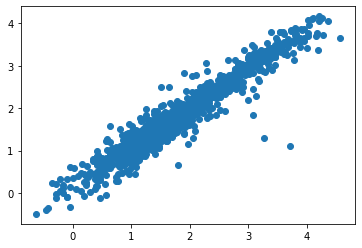

In [194]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test['price_log'], mod_predict)

In [ ]:
#observation the imputing process and the training process take very little time once you know the setting to train it on
# the imputed data set also seems to perform better by about 8 % on the test set. but also slightly worse for the training set

In light of this information it would be prudent to note that the final solution design will you a Random Forest Regressor regarding the car price. The time running through this entire program takes over 10 mins and is un acceptable for consumers. However most of the time is sunk into determining which model is most suitable and interating through the model versions. Assuming one knows the optimized version to start with the operation taken about 6 sec which is more reasonable. Then if we were to already have the model it would be almost instantly. 

With this is mind a solution could be to routinely double check whether this model is still suitable for the problem and gather all the data and running a through analysis for example maybe over a month. Then generate a model and save that model via external software like cPickle, and load it to a customer service deliverable (eg. website).